# Preprocessing

In [1]:
%run project_functions.ipynb

Using TensorFlow backend.
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

In [16]:
file_name = 'FB.json'
csv_name = 'FB.csv'

In [3]:
#Features
company = stock_twits_text_parser(file_name)
company_metrics = stock_twits_metrics(company, 3, file_name)

#Labels
company_return = return_over_period_T(csv_name,3)

#Cleaned Data
agg_data = feature_selector(company_metrics, company_return, 'close_return', 25, 1000)
company_data = split_data(agg_data, 0.7, 'all', 'close_return', 'cont')

#Split
X_train = company_data['X_train']
Y_train = company_data['Y_train']
X_test = company_data['X_test']
Y_test = company_data['Y_test']

#Define Values for SVR Parameters
degrees = [2,3,4,5,6,7,8]
reg_vals = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]



In [4]:
# Find best model
model = get_best_SVR(model_type = 'all', alphas = reg_vals, degrees = degrees, folds = 5, X_train = X_train, Y_train = Y_train)

# training and test predictions
pred_train_svr = model.predict(X_train)
pred_test_svr = model.predict(X_test)



Best Parameters: 
{'C': 0.01, 'degree': 2, 'kernel': 'rbf'}
Ignore degree value if kernel is not 'poly' 


In [5]:
Y_train

0     -0.001572
1      0.000413
2      0.011044
3     -0.013433
4     -0.029384
         ...   
233    0.018558
234    0.048729
235    0.013221
236    0.000350
237    0.021176
Name: close_return, Length: 238, dtype: float64

In [6]:
pred_train_svr

array([ 1.26309332e-03,  1.27660570e-03,  2.02792666e-02,  2.73355938e-03,
        1.84765905e-02,  1.41555409e-03,  3.84341786e-04,  1.78105069e-02,
        1.97781588e-03,  3.79310787e-03,  1.82197046e-03,  1.35859851e-03,
        1.96099847e-02,  1.19466545e-03,  1.28760269e-03,  8.67568943e-04,
        1.07805563e-03,  1.44890887e-02,  4.27655645e-03,  1.12003434e-03,
        1.17785736e-03,  1.18901467e-03,  2.04251771e-02,  2.60517437e-04,
        8.31845913e-04,  2.77409051e-03,  8.38498809e-04,  1.62946188e-02,
        2.71721585e-03,  8.79280345e-04,  7.63155101e-04,  9.98056774e-04,
        1.87639836e-02,  5.22227198e-03,  5.31826757e-04,  7.70677136e-04,
        7.40829679e-03,  2.37535366e-03,  8.64279350e-04,  2.23690630e-03,
        8.84822847e-04,  2.02162646e-02,  2.28091551e-03,  1.03046083e-03,
        2.04821017e-03,  3.56463898e-04,  1.72395669e-02,  6.62585397e-04,
        1.04474848e-03,  7.41803428e-04,  1.33914628e-03,  1.83515743e-02,
        1.16708855e-03,  

# Action Signal Mapping

- 1 = Positive Action
- 0 = No Action
- -1 = Negative Action

In [7]:
threshold = .001


action_signal_train = np.copy(Y_train)
action_signal_train[action_signal_train < -1*threshold] = -1
action_signal_train[action_signal_train > threshold] = 1
action_signal_train[np.abs(action_signal_train) <= threshold] = 0

action_signal_test = np.copy(Y_test)
action_signal_test[action_signal_test < -1*threshold] = -1
action_signal_test[action_signal_test > threshold] = 1
action_signal_test[np.abs(action_signal_test) <= threshold] = 0

action_signal_predict_train = np.copy(pred_train_svr)
action_signal_predict_train[action_signal_predict_train < -1*threshold] = -1
action_signal_predict_train[action_signal_predict_train > threshold] = 1
action_signal_predict_train[np.abs(action_signal_predict_train) <= threshold] = 0

action_signal_predict_test = np.copy(pred_test_svr)
action_signal_predict_test[action_signal_predict_test < -1*threshold] = -1
action_signal_predict_test[action_signal_predict_test > threshold] = 1
action_signal_predict_test[np.abs(action_signal_predict_test) <= threshold] = 0



In [8]:
action_signal_train

array([-1.,  0.,  1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,
        1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,
       -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
       -1., -1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
       -1., -1.,  1., -1., -1., -1.,  0., -1.,  1.,  1., -1., -1., -1.,
        1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,
       -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1., -1., -1., -1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0., -1., -1., -1.,  1., -1., -1., -1., -1.,  1

In [9]:
action_signal_predict_train

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0.

# Classification Metrics

- Note: The cases detected as no action are not considered in these metrics

In [10]:
action_signal_train_metrics = np.empty((action_signal_train.shape))
action_signal_test_metrics = np.empty((action_signal_test.shape))
action_signal_predict_train_metrics = np.empty((action_signal_predict_train.shape))
action_signal_predict_test_metrics = np.empty((action_signal_predict_test.shape))

train_len = action_signal_train.shape[0]
test_len = action_signal_test.shape[0]

for i in range(0, train_len):
    if (np.abs(action_signal_train[i] + action_signal_predict_train[i]) == 1) or (action_signal_train[i] == 0 and action_signal_predict_train[i] == 0):
        action_signal_train_metrics[i] = 0
        action_signal_predict_train_metrics[i] = 0
    else:
        action_signal_train_metrics[i] = action_signal_train[i]
        action_signal_predict_train_metrics[i] = action_signal_predict_train[i]



for j in range(0, test_len):
    if (np.abs(action_signal_test[j] + action_signal_predict_test[j]) == 1) or (action_signal_test[j] == 0 and action_signal_predict_test[j] == 0):
        action_signal_test_metrics[j] = 0
        action_signal_predict_test_metrics[j] = 0
    else:
        action_signal_test_metrics[j] = action_signal_test[j]
        action_signal_predict_test_metrics[j] = action_signal_predict_test[j]



In [11]:
action_signal_train_metrics =  action_signal_train_metrics[action_signal_train_metrics != 0]
action_signal_test_metrics =  action_signal_test_metrics[action_signal_test_metrics != 0]
action_signal_predict_train_metrics = action_signal_predict_train_metrics[action_signal_predict_train_metrics != 0]
action_signal_predict_test_metrics = action_signal_predict_test_metrics[action_signal_predict_test_metrics != 0]

In [12]:
cm_action_signal_train = confusion_matrix(action_signal_train_metrics,action_signal_predict_train_metrics)
cm_action_signal_test = confusion_matrix(action_signal_test_metrics,action_signal_predict_test_metrics)

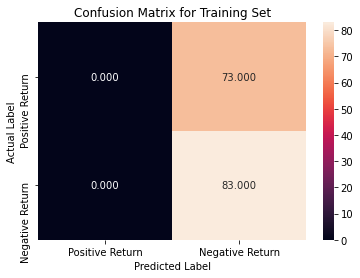

In [13]:
plot_confusion_matrix(cm_action_signal_train, "Training")

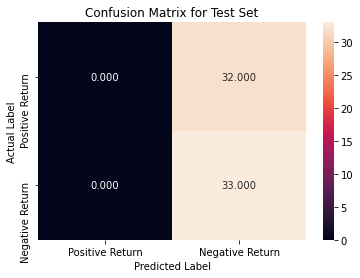

In [14]:
plot_confusion_matrix(cm_action_signal_test, "Test")

In [15]:
table = create_metrics_table(action_signal_train_metrics, action_signal_predict_train_metrics, action_signal_test_metrics, action_signal_predict_test_metrics)
table


,Recall,Precision,F1 Score,Accuracy
Dataset,,,,
Training,1.0,0.532051,0.694561,0.532051
Test,1.0,0.507692,0.673469,0.507692
